
# KNN Classification on Cisco IoT Dataset

This notebook performs a detailed analysis using the **K-Nearest Neighbors (KNN)** classification model on Cisco's **Internet of Things (IoT)** business dataset.

We will:
- Explore and visualize the dataset (EDA)
- Preprocess and scale features
- Train and validate a KNN model
- Evaluate and interpret model performance

**Target**: `Operational_Risk_Level` (Low, Medium, High)


## Step 1: Import Libraries and Load Dataset

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Load dataset
df = pd.read_csv('cisco_iot_knn_data.csv')
df.head()


,Customer_ID,Region,Customer_Segment,Product_Line,Connectivity_Type,Deployment_Environment,Monitoring_Platform,Connected_Devices,Daily_Data_Usage_GB,Monthly_Incidents,Avg_Incident_Response_Hours,Firmware_Update_Frequency_Months,Uptime_Percentage,Downtime_Hours_Monthly,Support_Tickets_Opened,Customer_Satisfaction_Score,Training_Completed,Operational_Risk_Level
0,199b7ac0-311f-46ce-98ce-9654e588df25,Middle East & Africa,Utilities,Edge Gateway,4G LTE,Outdoor,Custom Platform,2817,68.70,6,4.36,2,95.71,4.88,2,1,0,Low
1,4bf49028-ffee-461c-a149-01dea347dd2d,Asia Pacific,Oil & Gas,Rugged Router,Ethernet,Mobile,Meraki,1231,18.69,2,0.59,5,98.69,6.05,1,5,1,High
2,ca43745d-5e17-4a59-88a2-eca993b6e96d,Europe,Manufacturing,IoT Controller,5G,Indoor,Custom Platform,3234,46.41,2,2.28,3,92.58,2.80,2,5,0,Low
3,6368e390-f6cd-47b8-9544-3a1a1af3bbc0,Asia Pacific,Oil & Gas,Rugged Router,5G,Outdoor,Custom Platform,3423,43.31,3,0.46,5,90.59,0.77,4,4,1,Medium
4,948692f4-a16f-4ca5-8fbf-c13c573c2bd6,Middle East & Africa,Smart Cities,Industrial Switch,5G,Hybrid,Meraki,1093,43.27,1,2.17,10,91.12,4.31,2,5,0,Medium


## Step 2: Exploratory Data Analysis (EDA)

In [ ]:

# Dataset overview
print("Shape:", df.shape)
df.info()


Shape: (15345, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15345 entries, 0 to 15344
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer_ID                       15345 non-null  object 
 1   Region                            15345 non-null  object 
 2   Customer_Segment                  15345 non-null  object 
 3   Product_Line                      15345 non-null  object 
 4   Connectivity_Type                 15345 non-null  object 
 5   Deployment_Environment            15345 non-null  object 
 6   Monitoring_Platform               15345 non-null  object 
 7   Connected_Devices                 15345 non-null  int64  
 8   Daily_Data_Usage_GB               15345 non-null  float64
 9   Monthly_Incidents                 15345 non-null  int64  
 10  Avg_Incident_Response_Hours       15345 non-null  float64
 11  Firmware_Update_Frequency_Months  15345 non-null

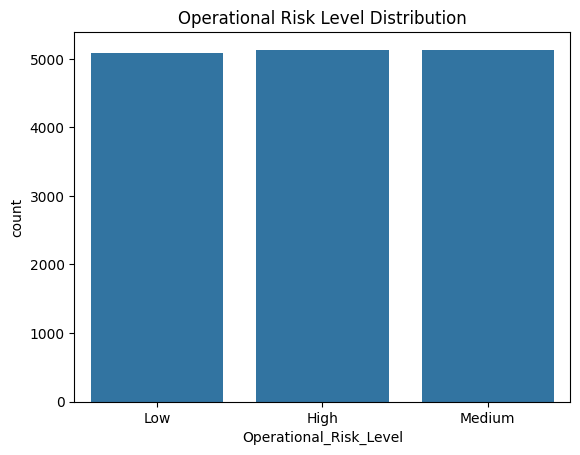

In [ ]:

# Check distribution of the target
sns.countplot(data=df, x='Operational_Risk_Level')
plt.title('Operational Risk Level Distribution')
plt.show()


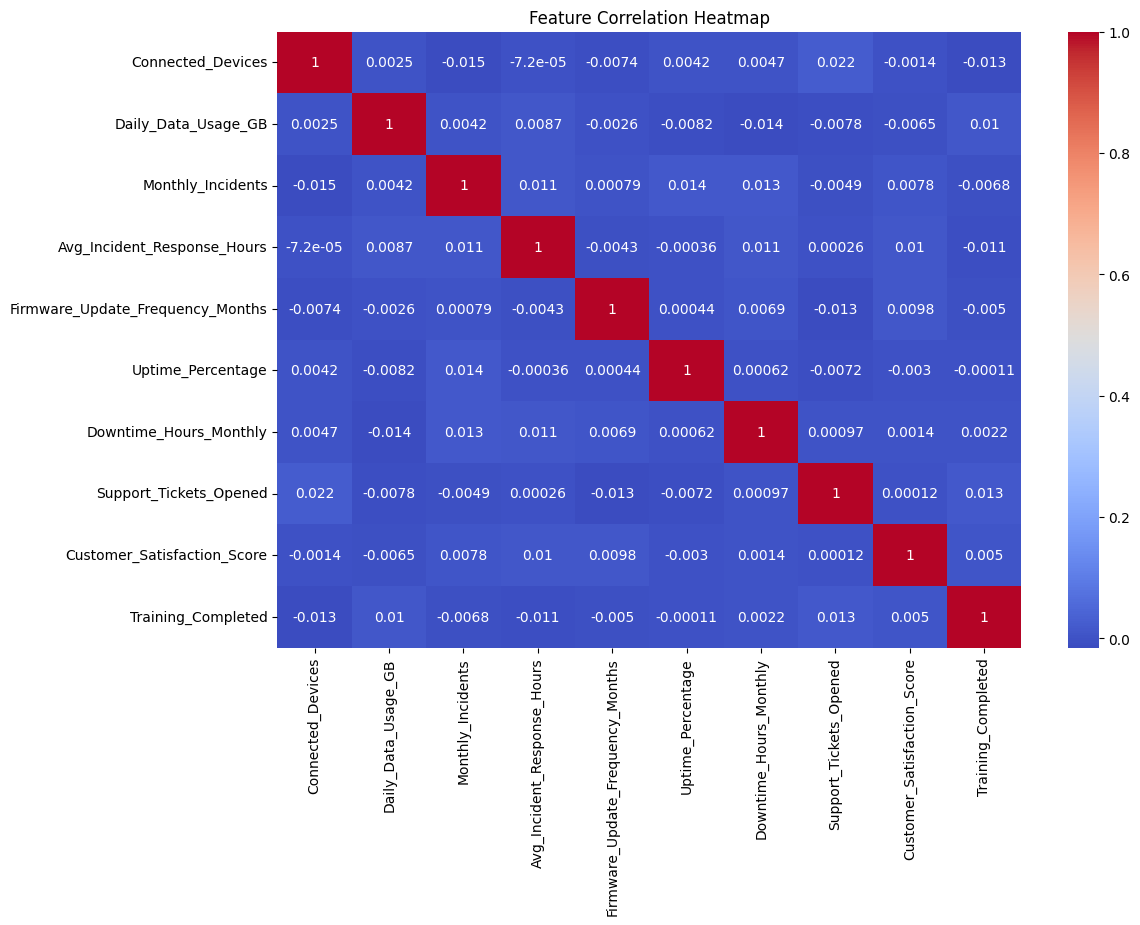

In [ ]:

# Correlation heatmap for numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


## Step 3: Data Preprocessing

In [ ]:

# Encode target label
le = LabelEncoder()
df['Risk_Level_Label'] = le.fit_transform(df['Operational_Risk_Level'])

# Prepare feature matrix and labels
X = df.drop(columns=['Customer_ID', 'Operational_Risk_Level', 'Risk_Level_Label'])
X = pd.get_dummies(X, drop_first=True)
y = df['Risk_Level_Label']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Step 4: Finding the Optimal K

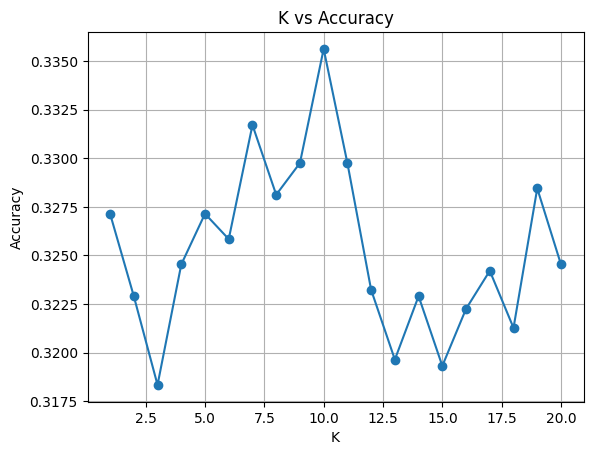

In [ ]:

accuracies = []
k_range = range(1, 21)

# Try different values of K
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    accuracies.append(acc)

# Plot K vs Accuracy
plt.plot(k_range, accuracies, marker='o')
plt.title('K vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


## Step 5: Train KNN Model with Optimal K

In [ ]:

# Select the best K
best_k = np.argmax(accuracies) + 1
print("Best K:", best_k)

# Train final model
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)


Best K: 10


KNeighborsClassifier(n_neighbors=np.int64(10))

## Step 6: Model Evaluation

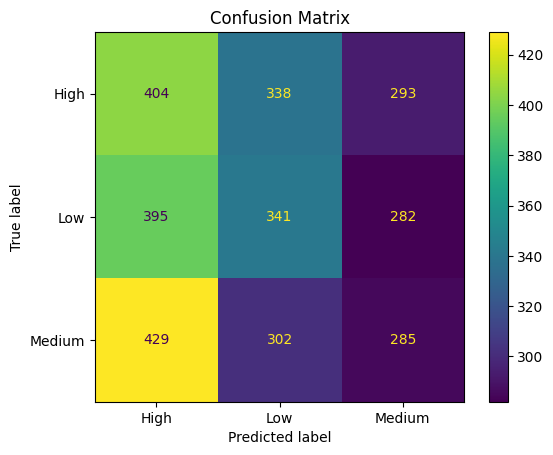

              precision    recall  f1-score   support

        High       0.33      0.39      0.36      1035
         Low       0.35      0.33      0.34      1018
      Medium       0.33      0.28      0.30      1016

    accuracy                           0.34      3069
   macro avg       0.34      0.34      0.33      3069
weighted avg       0.34      0.34      0.33      3069



In [ ]:

# Predictions
y_pred = knn.predict(X_test)

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=le.classes_)
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=le.classes_))



## Step 7: Interpretation of Results

- **Accuracy**: Overall correctness of predictions.
- **Precision/Recall/F1**: Helpful in evaluating class-wise performance.
- **Confusion Matrix**: Visualizes correct and incorrect predictions by class.
- If performance is poor, consider:
  - Feature selection
  - Dimensionality reduction (e.g. PCA)
  - Trying weighted KNN or different distance metrics



## Step 8: Conclusion

This KNN classification model predicts **Operational Risk Level** in an IoT context. The insights help Cisco:
- Detect which deployments are at higher risk
- Prioritize support and mitigation
- Enhance system uptime and customer experience
